# Stochastic Reduce Order Model Example 1

- Author: Mohit S. Chauhan 
- Date: June 4, 2018

In this example, Stratified sampling is used to generate samples from Gamma distribution and weights are defined using Stochastic Reduce Order Model (SROM).

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS and SROM class from UQpy.

In [1]:
from UQpy.surrogates import SROM
from UQpy.sampling import RectangularStrata
from UQpy.sampling import TrueStratifiedSampling
from UQpy.distributions import Gamma
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

Create a distribution object for Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.

In [2]:
marginals = [Gamma(a=2., loc=1., scale=3.), Gamma(a=2., loc=1., scale=3.)]

Create a strata object.

In [3]:
strata = RectangularStrata(strata_number=[4, 4])

Using UQpy STS class to generate samples for two random variables having Gamma distribution.

In [4]:
x = TrueStratifiedSampling(distributions=marginals, strata_object=strata, nsamples_per_stratum=1)

Run SROM using the defined Gamma distribution. Here we use the following parameters.

- Gamma distribution with shape, shift and scale parameters as 2, 1 and 3.
- First and second order moments about origin are 6 and 54.
- Notice that pdf_target references the Gamma function directly and does not designate it as a string.
- Samples are uncorrelated, i.e. also default value of correlation.

In [5]:
y = SROM(samples=x.samples,
         target_distributions=marginals,
         moments=np.array([[6., 6.], [54., 54.]]))
y.run(properties=[True, True, True, True])

Plot the samples and weights from SROM class. Also, compared with the CDF of gamma distrbution.

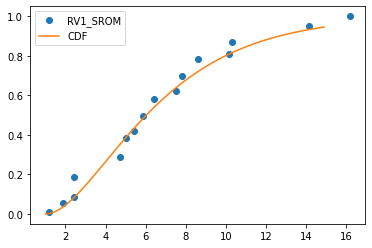

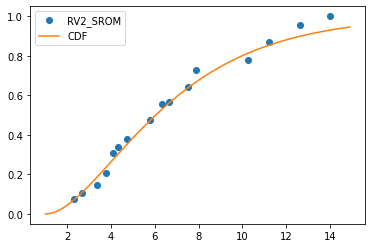

In [6]:
c = np.concatenate((y.samples, y.sample_weights.reshape(y.sample_weights.shape[0], 1)), axis=1)
d = c[c[:, 0].argsort()]
plt.plot(d[:, 0], np.cumsum(d[:, 2], axis=0), 'o')
plt.plot(np.arange(1, 15, 0.1), stats.gamma.cdf(np.arange(1, 15, 0.1), 2, loc=1, scale=3))
plt.legend(['RV1_SROM', 'CDF'])
plt.show()
e = c[c[:, 1].argsort()]
plt.plot(e[:, 1], np.cumsum(e[:, 2], axis=0), 'o')
plt.plot(np.arange(1, 15, 0.1), stats.gamma.cdf(np.arange(1, 15, 0.1), 2, loc=1, scale=3))
plt.legend(['RV2_SROM', 'CDF'])
plt.show()

A note on the weights corresponding to error in distribution, moments and correlation of random variables:

- For this illustration, error_weigths are not defined and default value is [1, 0.2, 0]. These weights can be changed to obtain desired accuracy in certain properties.

In [7]:
print(y.sample_weights)

[0.03341623 0.03838418 0.07477068 0.05845805 0.09752104 0.10412143
 0.04130502 0.02751219 0.0094773  0.0738314  0.08656297 0.08104374
 0.04407136 0.09339424 0.08437613 0.05175402]
